In [1]:
# IMPORT LIBRERIAS (RECOMENDADAS)
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import pydotplus
import graphviz
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
# CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import tqdm

%matplotlib notebook



### 2 -  Importacion de CSV o DB`S
#### <span style="color:red">Cambie el nombre de los archivos por los espacios, favor verificar.</span>.

In [2]:

# CSV - DB features / caracteristicas
df1 = pd.read_csv("featuresdataset.csv", sep=",") 
# CSV - DB  FECHAS DE VENTAS
df2 = pd.read_csv("sales-data-set.csv", sep=",")
# tablaa 1 
df3 = pd.read_csv("Tabla_1.csv", sep=",")

### 3 - Limpiar columnas y verificacion de los datos

In [3]:
df1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [4]:
df2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [5]:
df3.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

### 4- Visualizacion

In [6]:
df1.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
df2.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [8]:
# se ordeno ya que los registros por el orden 'Store' no existia
df3 = df3.sort_values(by="Store", ascending=True)

In [9]:
df3.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
39,39,3,11,27/07/2012,40542.176288,False,85.106935,3.407,20044.793851,5683.043138,34202.989018,2847.867501,19341.483682,225.453758,6.334,False
10,10,3,10,01/06/2012,262010.005704,False,87.287100,3.501,68165.438344,32955.483257,25386.696655,16291.554344,17766.078476,225.251831,6.664,False
47,47,4,17,01/07/2011,658657.978555,False,85.333454,3.504,59798.190056,3377.202496,31290.463833,13699.070322,10272.478417,129.089400,5.644,False
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,9436.763466,41393.898678,29216.144403,15784.237223,7165.225061,129.606067,5.644,False
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,9691.276227,464.157260,21484.678945,15838.706634,10074.683942,216.603308,6.529,False


In [10]:
### cantidad de registros
print(df1.shape)
print(df2.shape)
print(df3.shape)

(8190, 12)
(421570, 5)
(50, 16)


In [11]:
df1.describe(include = "all")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,05/02/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [12]:
df2.describe(include = "all")

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [13]:
df3.describe(include = "all")

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,50.00000,50.000000,50.000000,50,50.000000,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,42,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,14/01/2011,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,2,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
mean,24.50000,23.000000,41.180000,NaN,311881.166051,NaN,53.860291,3.410660,46823.431738,22639.282088,18694.939255,10694.782423,10883.580305,170.399624,7.786860,NaN
std,14.57738,12.748749,30.161937,NaN,200149.261403,NaN,32.810056,0.379839,28695.800590,15587.848802,10149.652571,6399.756015,6220.437869,39.681079,1.985656,NaN
min,0.00000,3.000000,2.000000,NaN,11877.665598,NaN,-0.149522,2.720000,166.671403,464.157260,233.535025,348.902159,405.051798,126.208548,4.145000,NaN
25%,12.25000,11.000000,16.250000,NaN,154829.287341,NaN,27.754418,3.142000,17566.715113,7016.254677,9755.597789,4983.073330,5240.451037,132.856661,6.628750,NaN
50%,24.50000,23.000000,31.000000,NaN,244411.544868,NaN,53.154975,3.434500,53725.974939,22039.237903,19015.169457,10407.273632,11535.964587,141.409535,7.520500,NaN
75%,36.75000,34.000000,59.750000,NaN,500367.379137,NaN,84.572924,3.672500,72073.894875,33955.983194,26062.501079,15723.423856,16845.957447,210.714492,8.799500,NaN


In [14]:
#### verificar tipos NaN
print("----------df1--------------")
print(pd.isna(df1).sum())
print("-----------df2-------------")
print(pd.isna(df2).sum())
print("----------df3--------------")
print(pd.isna(df3).sum())

----------df1--------------
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
-----------df2-------------
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
----------df3--------------
Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


In [15]:
# eleiminacion de columnas df1
df1 = df1.drop(['MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', "MarkDown5"], axis = 1)

In [16]:
df1

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,NaN,NaN,False


In [17]:
# suma y conteo total de las ventas
total_ventas = df1.groupby('Store')['Fuel_Price'].agg(['sum','count'])

In [18]:
total_ventas.columns

Index(['sum', 'count'], dtype='object')

In [20]:
# cambio de titulos en df
total_ventas.columns = ["total_ventas", "conteo"]

In [21]:
total_ventas.head()

,total_ventas,conteo
Store,,
1,593.182,182
2,593.182,182
3,593.182,182
4,592.389,182
5,593.182,182


In [22]:
print(total_ventas.columns.tolist())
print(total_ventas.shape)

['total_ventas', 'conteo']
(45, 2)


<IPython.core.display.Javascript object>


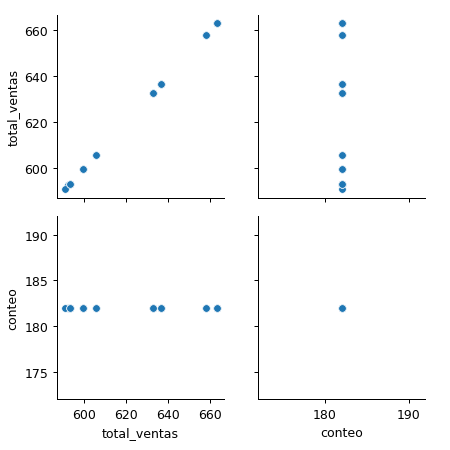

In [23]:
g = sns.PairGrid(total_ventas[["total_ventas","conteo"]])
g.map(sns.scatterplot)

#### 5- UNION DadaSet

In [24]:
newdf = pd.merge(df1, df2, on=["Store", "Date"], how="left")

In [25]:
newdf.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,1.0,24924.50,False
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,2.0,50605.27,False
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,3.0,13740.12,False
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,4.0,39954.04,False
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,5.0,32229.38,False


<IPython.core.display.Javascript object>


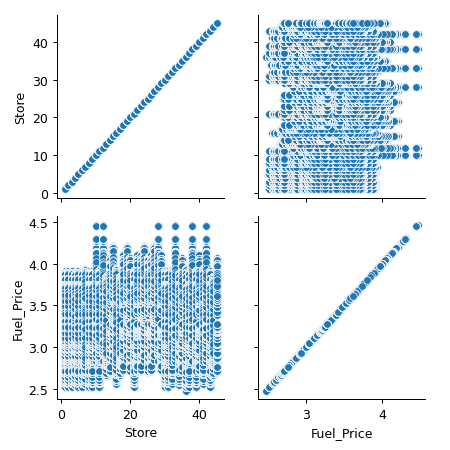

In [26]:
# nuevo grafico con la fecha
# se unieron ya que comparten las fechas (atributos comunes)
g = sns.PairGrid(newdf[["Store","Date","Fuel_Price"]])
g.map(sns.scatterplot)

### 6 - dimension del dataframe

In [27]:
newdf.shape

(423325, 10)

In [28]:
newdf.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI              585
Unemployment     585
IsHoliday_x        0
Dept            1755
Weekly_Sales    1755
IsHoliday_y     1755
dtype: int64

In [29]:
newdf.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Weekly_Sales', 'IsHoliday_y'],
      dtype='object')

In [30]:
# id de departamentos unicos
print(newdf["Dept"].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 40. 41. 42. 44. 45. 46. 47. 48. 49. 51. 52. 54. 55. 56. 58. 59. 60.
 67. 71. 72. 74. 79. 80. 81. 82. 83. 85. 87. 90. 91. 92. 93. 94. 95. 97.
 98. 78. 96. 99. 77. nan 39. 50. 43. 65.]


In [32]:
print(len(newdf["Dept"].unique()))

82


### 7 -Separacion atributos y vetor de LBL

In [33]:
# variable si es feriado
newdf.iloc[:, 6].values


array([False, False, False, ..., False, False, False])

In [34]:
# vector de label pasar a categoricas las variables
le = preprocessing.LabelEncoder()
y = le.fit_transform(newdf.iloc[:,6].values)
y


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# matriz de atrubutos
x = newdf.iloc[:,9].values

### 8 Normalizacion StandarScaler


<IPython.core.display.Javascript object>


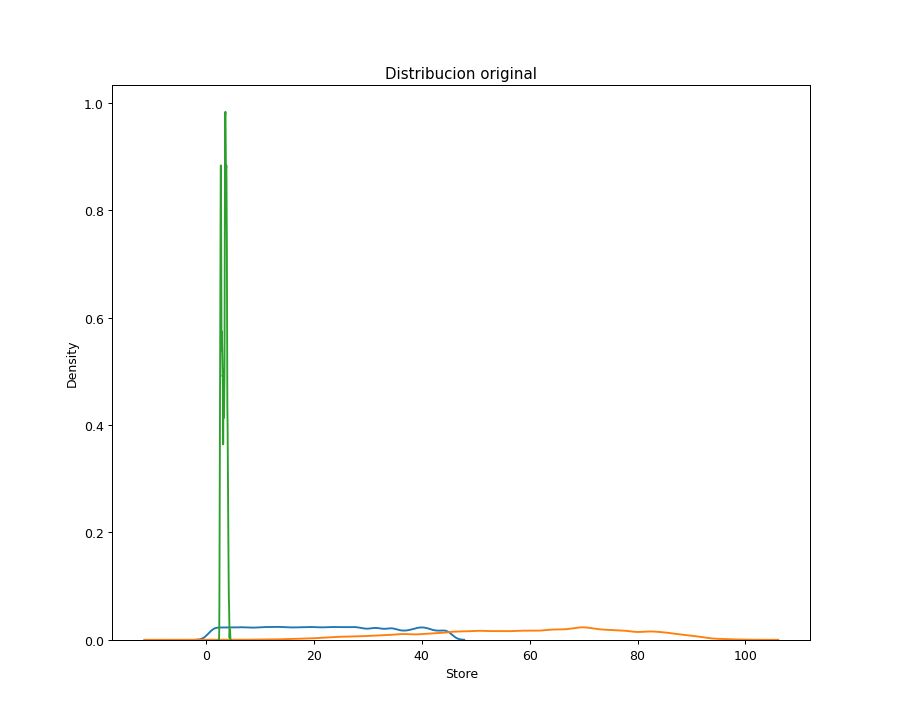

<AxesSubplot: title={'center': 'Distribucion original'}, xlabel='Store', ylabel='Density'>

In [36]:
# visualizacion
fig, axl = plt.subplots(ncols=1, figsize=(10,8))
axl.set_title("Distribucion original")

sns.kdeplot(newdf["Store"], ax=axl)
# sns.kdeplot(newdf["Date"], ax=axl)
sns.kdeplot(newdf["Temperature"], ax=axl)
sns.kdeplot(newdf["Fuel_Price"], ax=axl)

In [48]:
# distribucion mixmaxsacler
mm_scaler = MinMaxScaler()
df_mm = mm_scaler.fit_transform(newdf)

# df_mm = pd.DataFrame(df_mm, columns=col_names)

# fig, axl = plt.subplots(ncols=1, figsize=(10,8))
# axl.set_title("Despues MinMaxScaler")

# sns.kdeplot(df_mm["Store"], ax=axl)
# sns.kdeplot(newdf["Date"], ax=axl)
# sns.kdeplot(df_mm["Temperature"], ax=axl)
# sns.kdeplot(df_mm["Fuel_Price"], ax=axl)


ValueError: could not convert string to float: '05/02/2010'